首先让我们导入必须要的包

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

把数据存储为一个input.csv文件，然后从中提取出用来训练的x和y

In [2]:
data = pd.read_csv('input.csv')
print(data)
x = data.iloc[:,0].reshape(-1,1)
y = data.iloc[:,1].reshape(-1,1)

   month  price
0      1   6450
1      2   7450
2      3   8450
3      4   9450
4      5  11450
5      6  15450
6      7  18450


In [3]:
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [4]:
y

array([[ 6450],
       [ 7450],
       [ 8450],
       [ 9450],
       [11450],
       [15450],
       [18450]])

现在让我们把x和y拟合为线性回归模型。

In [5]:
regr = linear_model.LinearRegression()

In [6]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
regr.intercept_    #截距  即θ0

array([ 3164.28571429])

In [8]:
regr.coef_  #得到θi数组

array([[ 1964.28571429]])

In [9]:
regr.predict(8)

array([[ 18878.57142857]])

我们想要看看到底我们拟合出来的直线是怎么样的


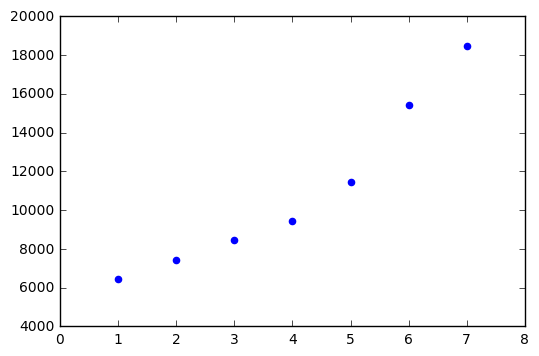

In [10]:
plt.scatter(x,y,color='blue')  #原始数据
plt.show()

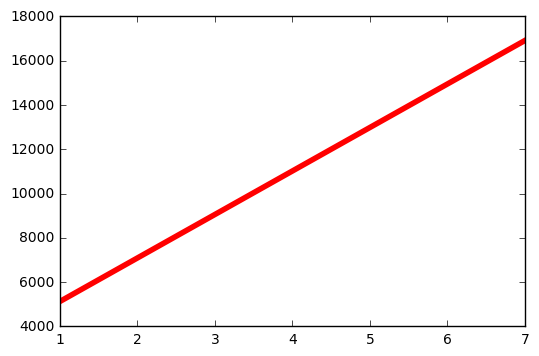

In [11]:
plt.plot(x,regr.predict(x),color='red',linewidth=4)    #预测出来的直线
plt.show()

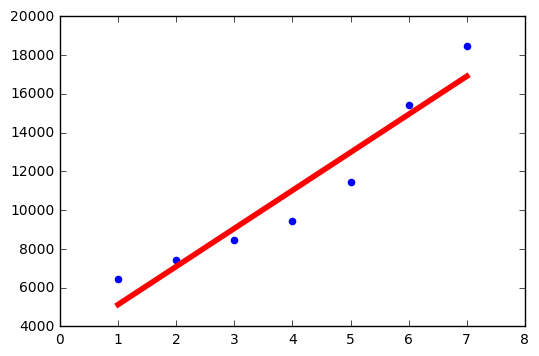

In [12]:
plt.scatter(x,y,color='blue') 
plt.plot(x,regr.predict(x),color='red',linewidth=4)    #将它们画在一张图上
plt.show()


那假如我们得到的数据有多个参数的情况下该怎么办呢？让我们来看下面这个例子

首先仍然是读入数据

In [13]:
data = pd.read_csv('input1.csv')

In [14]:
data

,X1,X2,y
0,1,1,1
1,2,2,2
2,3,3,3
3,4,4,4
4,5,5,5
5,6,6,6
6,7,7,7
7,8,8,8
8,9,9,9


In [15]:
x = data.iloc[:,0:2]    #取数据的所有行，前两列
y = data.y.reshape(-1,1)   #取数据的y值，并将其reshape成列向量

In [16]:
x = np.array(x)   #将x转化为numpy数组

In [17]:
x

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [18]:
y

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [19]:
regr = linear_model.LinearRegression()

In [20]:
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
regr.intercept_

array([ -1.77635684e-15])

In [22]:
regr.coef_

array([[ 0.5,  0.5]])

从我们的数据中可以看出来，计算得到的θ0等于0，θ1等于0.5，θ2等于0.5

In [23]:
regr.predict([[1,1],[2,2],[10,10],[10,20]])

array([[  1.],
       [  2.],
       [ 10.],
       [ 15.]])

接下来我们再来看看另外一种情况，假如说数据点间并不呈现明显的线性情况，而是非线性，比如说y = a * x^2 呢？ 
让我们来看下面的例子

In [26]:
data = pd.read_csv('input2.csv')

In [27]:
data

,x,y
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36


In [28]:
x = np.array(data.iloc[:,0]).reshape(-1,1)

In [29]:
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [30]:
y = np.array(data.iloc[:,1]).reshape(-1,1)

In [31]:
y

array([[ 1],
       [ 4],
       [ 9],
       [16],
       [25],
       [36]])

这里我们做出图来看

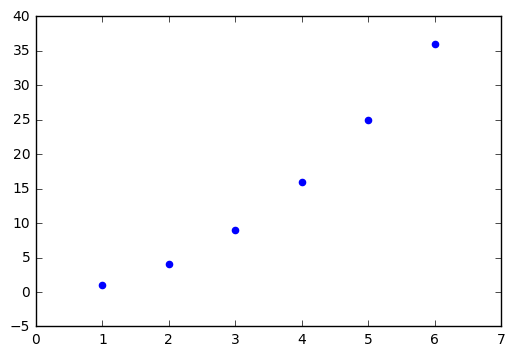

In [32]:
plt.scatter(x,y,color='blue')
plt.show()

可以看到我们的数据点呈现出一种类似于二次曲线的趋势，那么我们就可以把我们的点集取平方，这样就可以得到y = a * x^2这条线，这里的a
就是θ1

In [33]:
x_change = x ** 2

In [34]:
x_change.reshape(-1,1)

array([[ 1],
       [ 4],
       [ 9],
       [16],
       [25],
       [36]])

In [35]:
regr = linear_model.LinearRegression()

In [36]:
regr.fit(x_change,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
regr.predict(np.array([1,49,9]).reshape(-1,1))  #当然我们在预测的时候对于输入的x值也要进行平方处理

array([[  1.],
       [ 49.],
       [  9.]])